In [53]:
import sys
!{sys.executable} -m pip install WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for WordCloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_10_9_universal2.whl size=215178 sha256=21629b23b1fc6f6460e5d250b04a5c63fbcd1f3256f72397db1a7b01cadcba10
  Stored in directory: /Users/noha/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built WordCloud


In [54]:
import pandas as pd
from textblob import TextBlob 
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [4]:
tags_db = pd.read_csv('../data/tags.csv')
tags_db.head()

,userId,movieId,tag,time_stamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Reviews CSV file has colum tags with users reviews written. 
With TextBlob Library you can extract adjectives from text 

In [5]:
tags_adj = tags_db

In [6]:
def get_adj(text): 
    blob = TextBlob(text)
    return [word for (word,tag)in blob.tags if tag.startswith('JJ')]

tags_adj['adjectives'] = tags_adj['tag'].apply(get_adj)

In [8]:
#new string column is added with adjectives extracted from 'tag' column
tags_adj.dtypes

userId         int64
movieId        int64
tag           object
time_stamp     int64
adjectives    object
dtype: object

In [10]:
tags_adj.head()
#nlp function is not 100% accurate - missed funny adj.- but it worked.  

,userId,movieId,tag,time_stamp,adjectives
0,2,60756,funny,1445714994,[]
1,2,60756,Highly quotable,1445714996,[quotable]
2,2,60756,will ferrell,1445714992,[]
3,2,89774,Boxing story,1445715207,[]
4,2,89774,MMA,1445715200,[]


In [17]:
tags_adj.dtypes

userId         int64
movieId        int64
tag           object
time_stamp     int64
adjectives    object
dtype: object

In [18]:
#get rid of [] and '' marks

In [19]:
df = tags_adj.assign(result=tags_adj['adjectives'].str.replace(r'\[', ''))

In [21]:
df.dtypes

userId          int64
movieId         int64
tag            object
time_stamp      int64
adjectives     object
result        float64
dtype: object

In [ ]:
# Using replace fn to get rif of marks. ex:df['col1'] = df['col1'].str.replace(',', '')


In [25]:
df['adj1']= df['adjectives'].astype(str).str.replace('[','')
df.dtypes

userId          int64
movieId         int64
tag            object
time_stamp      int64
adjectives     object
result        float64
adj1           object
dtype: object

In [26]:
df.head()

,userId,movieId,tag,time_stamp,adjectives,result,adj1
0,2,60756,funny,1445714994,[],NaN,]
1,2,60756,Highly quotable,1445714996,[quotable],NaN,'quotable']
2,2,60756,will ferrell,1445714992,[],NaN,]
3,2,89774,Boxing story,1445715207,[],NaN,]
4,2,89774,MMA,1445715200,[],NaN,]


In [28]:
df['adj2']= df['adj1'].astype(str).str.replace(']','')
df.head()

,userId,movieId,tag,time_stamp,adjectives,result,adj1,adj2
0,2,60756,funny,1445714994,[],NaN,],
1,2,60756,Highly quotable,1445714996,[quotable],NaN,'quotable'],'quotable'
2,2,60756,will ferrell,1445714992,[],NaN,],
3,2,89774,Boxing story,1445715207,[],NaN,],
4,2,89774,MMA,1445715200,[],NaN,],


In [31]:
df['adj3']= df['adj2'].astype(str).str.replace("'","")
df.head()

,userId,movieId,tag,time_stamp,adjectives,result,adj1,adj2,adj3
0,2,60756,funny,1445714994,[],NaN,],,
1,2,60756,Highly quotable,1445714996,[quotable],NaN,'quotable'],'quotable',quotable
2,2,60756,will ferrell,1445714992,[],NaN,],,
3,2,89774,Boxing story,1445715207,[],NaN,],,
4,2,89774,MMA,1445715200,[],NaN,],,


In [32]:
df= df.drop(['adjectives', 'result','adj1','adj2'], axis=1)

In [35]:
#drop all null values 
tag_adj_selected = df.dropna()

In [36]:
#from a previous sql query movieids of top 10 movies are : 
top_10 = tag_adj_selected.loc[tag_adj_selected['movieId'].isin([356 ,318 ,296 ,593 ,2571 ,260 ,480 ,110 ,589 ,527])]

In [37]:
top_10.head()

,userId,movieId,tag,time_stamp,adj3
36,62,110,beautiful scenery,1528152541,beautiful
37,62,110,epic,1528152532,
38,62,110,historical,1528152523,historical
39,62,110,inspirational,1528152527,inspirational
40,62,110,Medieval,1528152528,


In [39]:
top_10 = top_10.drop(['tag','time_stamp'], axis =1)

In [70]:
#filter = df["Tenant"] != ""

0

In [71]:
mask = top_10['adj3'] != ''
df = top_10[mask]

In [72]:
df

,userId,movieId,adj3
36,62,110,beautiful
38,62,110,historical
39,62,110,inspirational
403,63,260,classic
408,103,260,great
...,...,...,...
3518,599,296,strong
3530,599,296,sophisticated
3545,599,296,unpredictable
3546,599,296,unusual


In [42]:
# get top 10 movies names 
df_movies = pd.read_csv('../data/movies.csv')

In [48]:
#filter movies 

movie_list = [110, 260, 296, 318, 356,480, 527, 589,593, 2571]
mask = df_movies['movieId'].isin(movie_list)
df_filtered_movies = df_movies[mask]


In [49]:
df_filtered_movies

,movieId,title,genres,year
97,110,Braveheart,Action|Drama|War,1995
224,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977
257,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994
277,318,"Shawshank Redemption, The",Crime|Drama,1994
314,356,Forrest Gump,Comedy|Drama|Romance|War,1994
418,480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993
461,527,Schindler's List,Drama|War,1993
507,589,Terminator 2: Judgment Day,Action|Sci-Fi,1991
510,593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991
1939,2571,"Matrix, The",Action|Sci-Fi|Thriller,1999


In [73]:
#group the adjectives of each movie
df_reviews = df.groupby(['movieId'])['adj3'].apply(lambda x: ', '.join(x)).reset_index()
df_reviews

,movieId,adj3
0,110,"beautiful, historical, inspirational"
1,260,"classic, great, classic, classic, classic, cla..."
2,296,"good, great, non-linear, achronological, aggre..."
3,318,wrongful
4,356,"lieutenant, stupid, emotional"
5,527,true
6,589,nuclear
7,593,gothic
8,2571,"martial, apocalyptic"


In [74]:
df_reviews.sort_values(by=['movieId'])

,movieId,adj3
0,110,"beautiful, historical, inspirational"
1,260,"classic, great, classic, classic, classic, cla..."
2,296,"good, great, non-linear, achronological, aggre..."
3,318,wrongful
4,356,"lieutenant, stupid, emotional"
5,527,true
6,589,nuclear
7,593,gothic
8,2571,"martial, apocalyptic"


In [75]:
df_reviews['movie_title'] = ['Brave Heart','Star Wars: Episode IV - A New Hope','Pulp Fiction','Shawshank Redemption, The','Forrest Gump','Schindlers List','Terminator 2: Judgment Day','Silence of the Lambs, The','Matrix, The']

In [76]:
df_reviews

,movieId,adj3,movie_title
0,110,"beautiful, historical, inspirational",Brave Heart
1,260,"classic, great, classic, classic, classic, cla...",Star Wars: Episode IV - A New Hope
2,296,"good, great, non-linear, achronological, aggre...",Pulp Fiction
3,318,wrongful,"Shawshank Redemption, The"
4,356,"lieutenant, stupid, emotional",Forrest Gump
5,527,true,Schindlers List
6,589,nuclear,Terminator 2: Judgment Day
7,593,gothic,"Silence of the Lambs, The"
8,2571,"martial, apocalyptic","Matrix, The"


In [82]:
# preparing adj3 column to be presented with a word cloud

In [80]:
text2 = df_reviews['adj3'].values[:, None]
text2 

array([['beautiful, historical, inspirational'],
       ['classic, great, classic, classic, classic, classic'],
       ['good, great, non-linear, achronological, aggressive, atmospheric, bad, bad, bible, biblical, big, big, black, black, casual, classic, classic, cool, classic, dark, dark, different, ensemble, fast-paced, foul, golden, good, good, great, great, great, quotable, innovative, intellectual, multiple, multiple, neo-noir, non-linear, non-linear, nonlinear, nonlinear, narrative, nonlinear, nonlinear, notable, offensive, original, original, philosophical, pop, psychological, Quotable, disturbing, disturbing, graphic, strong, strong, strong, sophisticated, unpredictable, unusual, funny'],
       ['wrongful'],
       ['lieutenant, stupid, emotional'],
       ['true'],
       ['nuclear'],
       ['gothic'],
       ['martial, apocalyptic']], dtype=object)

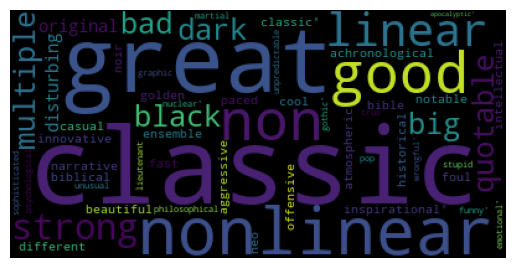

In [81]:
wordcloud = WordCloud().generate(str(text2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()